# Practical task: Hotel cancellations

<a id='intro'></a>
# Introduction

This data set contains information on 119,390 hotel bookings between July 2015 and August 2017. Each observation represents a hotel booking.

The data for two hotels is given. Both hotels are located in Portugal: the Resort Hotel is in the region of the Algarve and the City Hotel is in the city of Lisbon. A variety of categorical and numeric features are provided, including whether the book was cancelled.

Hotel management would find it useful to be able to predict whether a booking is likely to be cancelled.

<a id='import'></a>
# Importing libraries and data

<a id='libraries'></a>
## Importing the libraries

In [19]:
# pandas for data analysis
import pandas as pd

# seaborn for visualisation
import seaborn as sns

# seaborn has some unhelpful warnings at the moment
import warnings
warnings.filterwarnings("ignore", module="seaborn")

# Import functions from sklearn for building the model, training-testing split, visualising the model and metrics 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

# Function to draw the model
def plot_decision_tree(tree_model):
    fig, ax = plt.subplots(figsize=(20,8))
    plot_tree(tree_model,  
        filled=True, 
        impurity=False, 
        feature_names=input_features, 
        class_names=["No","Yes"], 
        proportion=True, 
        ax=ax)
    plt.show()

<a id='data'></a>
## Importing the data

In [20]:
import pandas as pd
hotel_data = pd.read_csv('../input/hotel-bookings/bookings_2023.csv')
hotel_data


,hotel,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,lead_time,stays_in_weekend_nights,...,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,adr,is_canceled
0,Resort Hotel,BB,Direct,Direct,C,C,No Deposit,Transient,342,0,...,0,0,0,0,3,0,0,0,0.00,0
1,Resort Hotel,BB,Direct,Direct,C,C,No Deposit,Transient,737,0,...,0,0,0,0,4,0,0,0,0.00,0
2,Resort Hotel,BB,Direct,Direct,A,C,No Deposit,Transient,7,0,...,0,0,0,0,0,0,0,0,75.00,0
3,Resort Hotel,BB,Corporate,Corporate,A,A,No Deposit,Transient,13,0,...,0,0,0,0,0,0,0,0,75.00,0
4,Resort Hotel,BB,Online TA,TA/TO,A,A,No Deposit,Transient,14,0,...,0,0,0,0,0,0,0,1,98.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,BB,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,23,2,...,0,0,0,0,0,0,0,0,96.14,0
119386,City Hotel,BB,Online TA,TA/TO,E,E,No Deposit,Transient,102,2,...,0,0,0,0,0,0,0,2,225.43,0
119387,City Hotel,BB,Online TA,TA/TO,D,D,No Deposit,Transient,34,2,...,0,0,0,0,0,0,0,4,157.71,0
119388,City Hotel,BB,Online TA,TA/TO,A,A,No Deposit,Transient,109,2,...,0,0,0,0,0,0,0,0,104.40,0


<a id='pre'></a>
# Preparing the data and exploratory data analysis

In [22]:
# replace numbers with categories
hotel_data['is_canceled'] = hotel_data['is_canceled'].replace({0: 'No', 1: 'Yes'})

# display the data to check
hotel_data



,hotel,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,lead_time,stays_in_weekend_nights,...,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,adr,is_canceled
0,Resort Hotel,BB,Direct,Direct,3,3,No Deposit,Transient,342,0,...,0,0,0,0,3,0,0,0,0.00,No
1,Resort Hotel,BB,Direct,Direct,3,3,No Deposit,Transient,737,0,...,0,0,0,0,4,0,0,0,0.00,No
2,Resort Hotel,BB,Direct,Direct,1,3,No Deposit,Transient,7,0,...,0,0,0,0,0,0,0,0,75.00,No
3,Resort Hotel,BB,Corporate,Corporate,1,1,No Deposit,Transient,13,0,...,0,0,0,0,0,0,0,0,75.00,No
4,Resort Hotel,BB,Online TA,TA/TO,1,1,No Deposit,Transient,14,0,...,0,0,0,0,0,0,0,1,98.00,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,BB,Offline TA/TO,TA/TO,1,1,No Deposit,Transient,23,2,...,0,0,0,0,0,0,0,0,96.14,No
119386,City Hotel,BB,Online TA,TA/TO,5,5,No Deposit,Transient,102,2,...,0,0,0,0,0,0,0,2,225.43,No
119387,City Hotel,BB,Online TA,TA/TO,4,4,No Deposit,Transient,34,2,...,0,0,0,0,0,0,0,4,157.71,No
119388,City Hotel,BB,Online TA,TA/TO,1,1,No Deposit,Transient,109,2,...,0,0,0,0,0,0,0,0,104.40,No


I replaced 0 and 1 for 'is_canceled' with no and yes respectively, because it's easier for me to interpret. Also, as you can see below, the computer also understands it.

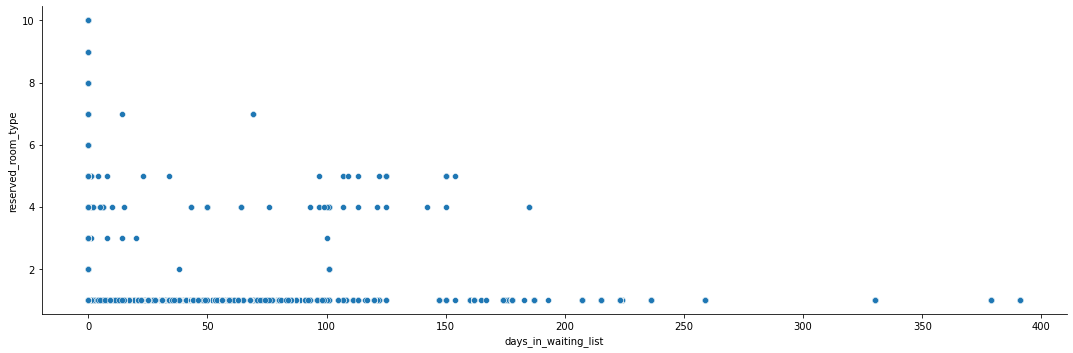

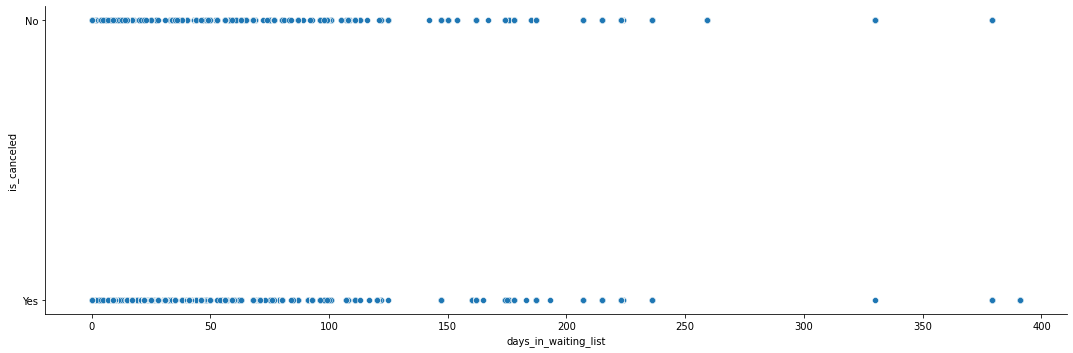

In [23]:
sns.relplot(data=hotel_data, x='days_in_waiting_list', y='reserved_room_type', aspect=3);
sns.relplot(data=hotel_data, x='days_in_waiting_list', y='is_canceled', aspect=3);

I'm looking at these scatter plots, and in the first one, I'm noticing a pattern: plenty of the people who booked room type A/1 (the space between the 2 numbers is the odd number), would have to wait for a very long time, especially compared to those who booked room type P/10. There's even a couple of people who had to wait ALMOST 400 days, which is longer than a year! (I screenshotted it too, I attached it to this markdown, it's at the end of this markdown). I don't know about you, but I think that's a long time, no?

This can mean that maybe room type A is a room type that needs lots of preparation, and it's important to note that, especially in the second one, where there doesn't seem to be a strong correlation betwwen days in waiting list and whether they cancel. This should be considered when I evaluate these models and data sets in the conclusion. 




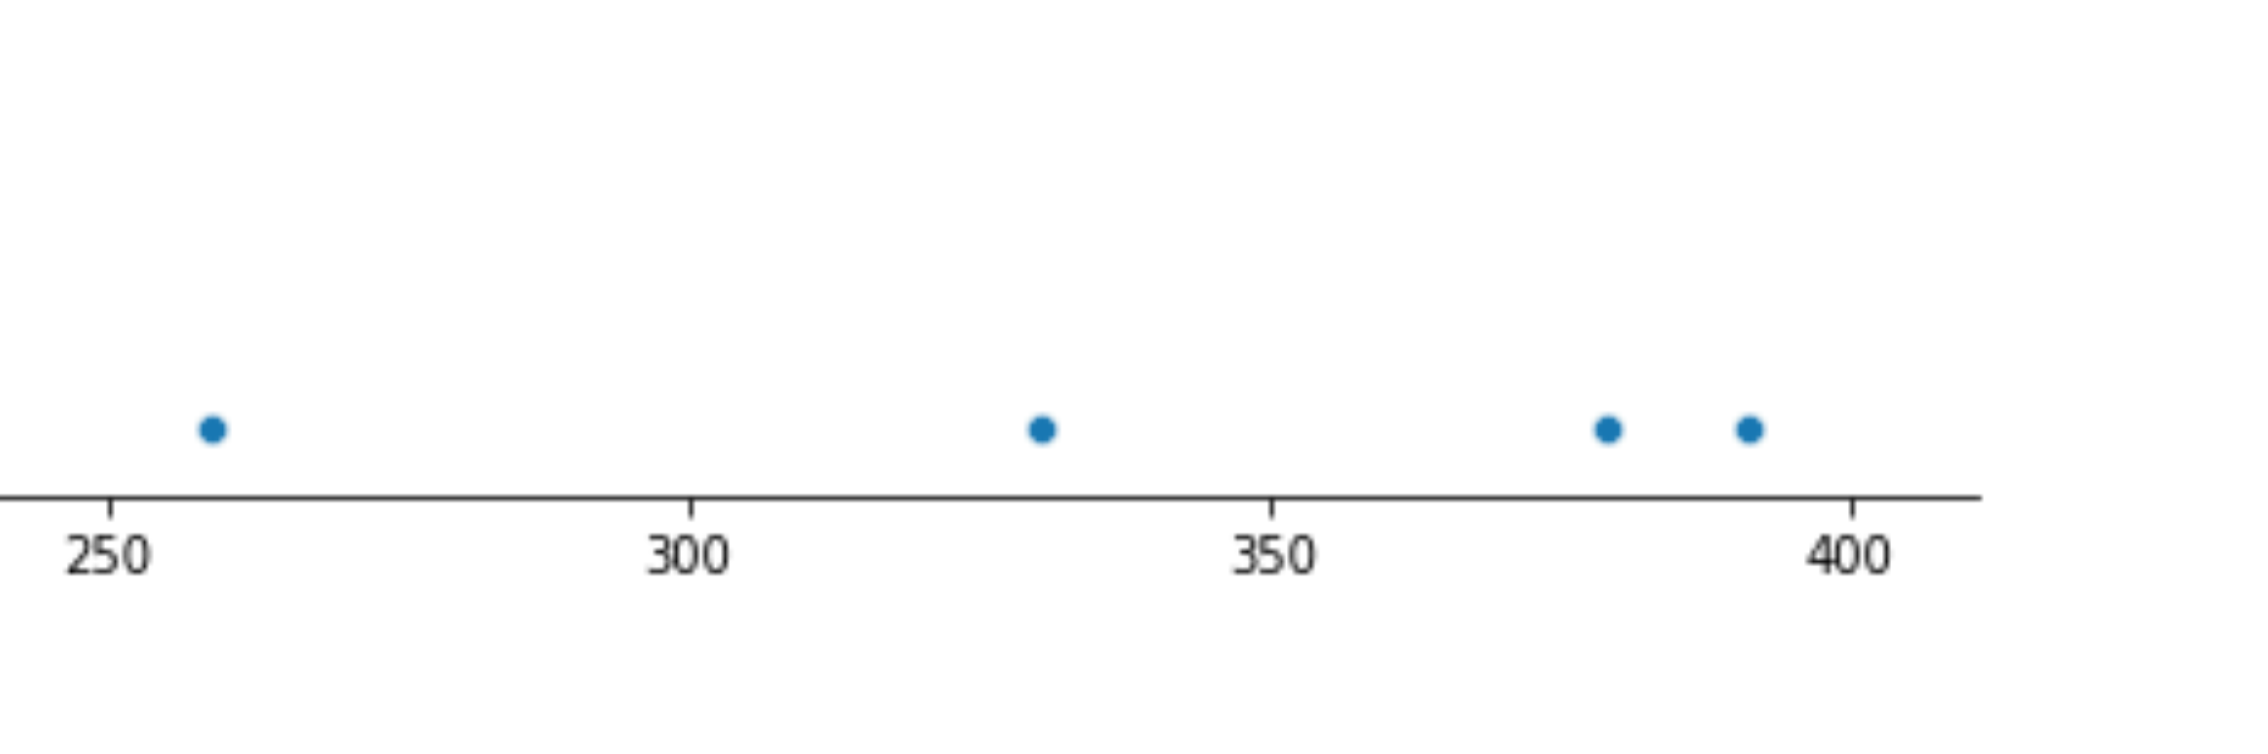

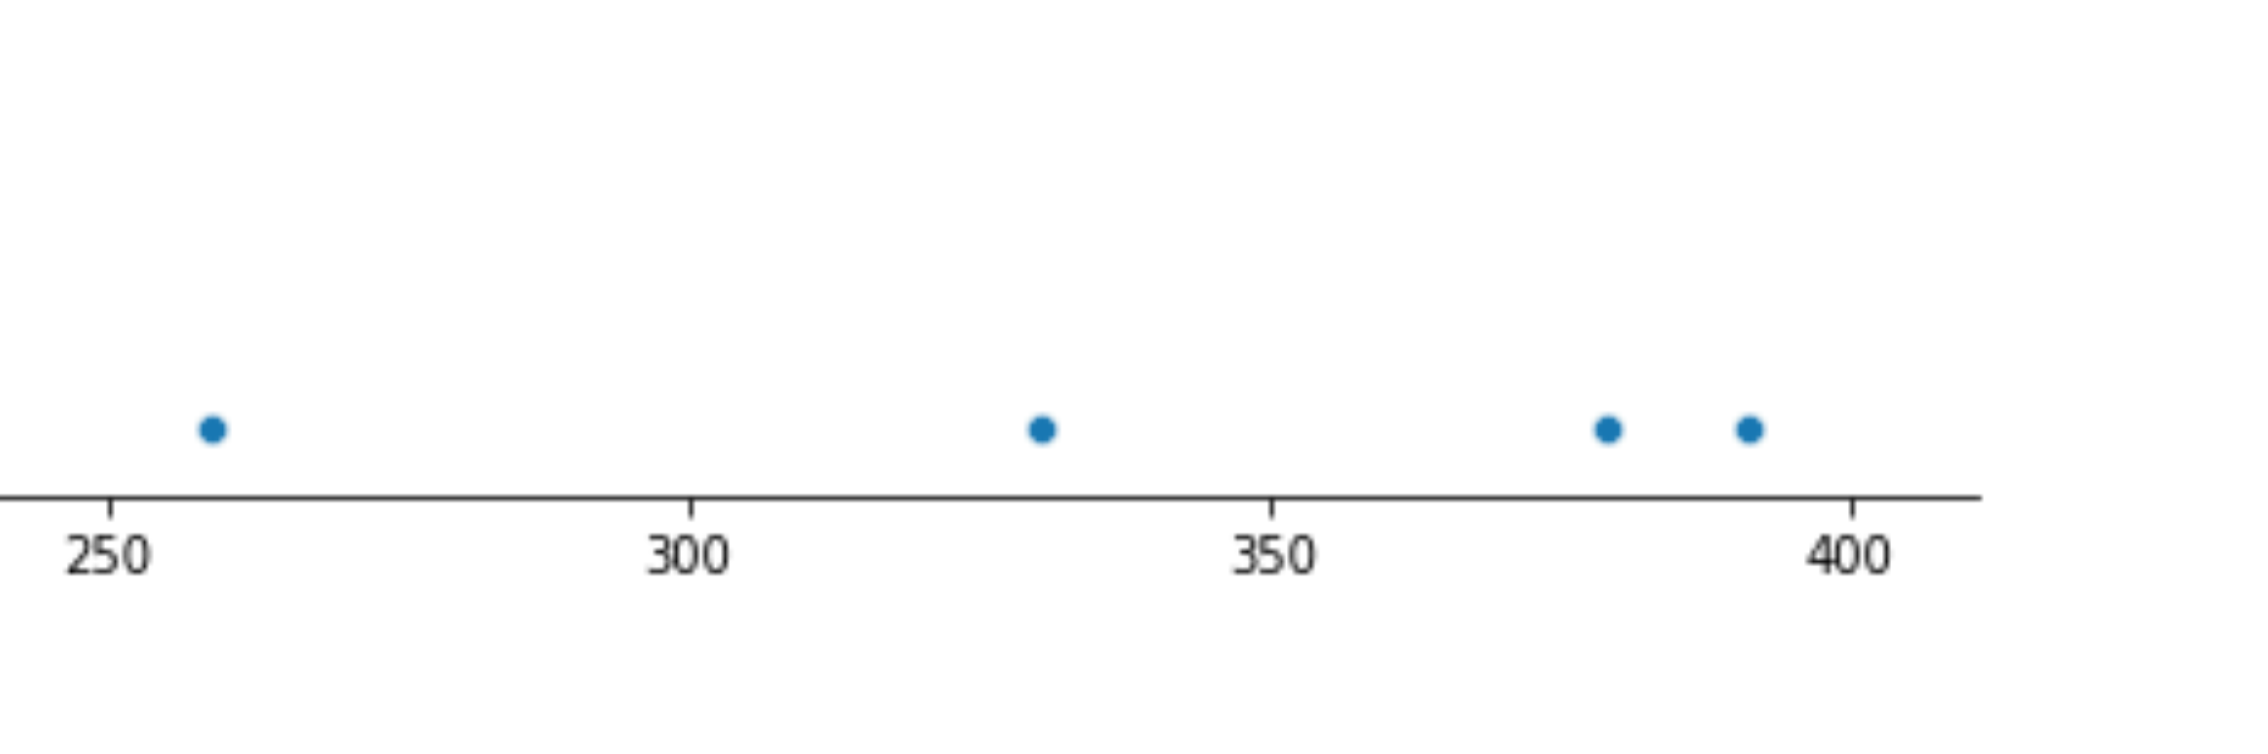

In [24]:
pd.crosstab(hotel_data['hotel'],hotel_data['is_canceled']) 

is_canceled,No,Yes
hotel,,
City Hotel,46228,33102
Resort Hotel,28938,11122


As we can see here, the City Hotel has many more cancelations than the Resort hotel, but we can also see that the City Hotel has had much more bookings than the Resort Hotel. So, it's for this reason why I think we should consider the ratio to cancelations to not cancelations:
The city hotel had 33102 cancelations (as seen in the table above), and 46228 didn't cancel. This means that if we put the ratios for not cancel:cancel for City Hotel, we get 1:0.716 (3dp), and for Resort hotel, it's 1:0.384, which is a much better ratio than city hotel, so this could help with our judgement. (You can get the value 0.716 by doing 33102/46228, and putting it to 1 in the form 1:n. And do the same for 11122/28938)



<a id='model'></a>
# Building a model
## Linear regression

In [26]:
#This is for the linear regression model
input_features=['previous_bookings_not_canceled']
X = hotel_data[input_features]
y = hotel_data['is_repeated_guest']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# create the model and display the parameters - output the coefficients and y-intercept
linear_model = LinearRegression().fit(X_train,y_train)
print('Coefficients: \n', linear_model.coef_.round(3))
print('Intercept: \n', linear_model.intercept_.round(3))

# create a list of the predictions and calculate the metrics (RMSE and R² score) by to the target values in y_test
y_pred = linear_model.predict(X_test) 
print('RMSE: ',mean_squared_error(y_test, y_pred, squared=False).round(3))
print('R²: ',(100*r2_score(y_test, y_pred)).round(3),"%")



print("            ")




hotel_data['deposit_type'] = hotel_data['deposit_type'].replace({'No Deposit': 0, 'Non Refund': 1, 'Refundable': 2})


Coefficients: 
 [0.05]
Intercept: 
 0.025
RMSE:  0.16
R²:  17.984 %
            


From the linear regression model, we can tell that most people who are returning customers are less likely to cancel their booking, and this is because there is a positive relationship between returning customers and their previous bookings not being cancelled. As you can see, the coefficient is 0.05, and the intercept is (0.025), and while this is small, it's still positive, which means that the amount of previous bookings not cancelled (in other words, previous bookings that have gone through) increases with repeated co Usually returning customers are those who had a good experience with the hotel previously, and would like to experience that service. It's like a restaurant, if you like the food, you go back whenever you can. So the returning customers are less likely to cancel their booking because they know what the hotel rooms, service, buffet's and location are all like. Not only that, but the RMSE values are very low too, meaning that this model is very accurate and there's not a LOT of errors.

However, where this model DOES fail, is in the strength of the predictions. See, with the current values returning a RMSE of just 0.16, there is little errors, but the R^2 values are also low. This means that the linear regression model is not very useful for high values of previous_bookings_not_canceled and is_repeated_guest. This can be due to other factors not being taken into account. For example, there could be many reasons why someone canceled, irrespective of whether they have been. They could have been sick for example, or decide not to go on holiday.

Overall, this model is suitable for predicting values when certain factors are taken into account, but when other factors like being sick or changing mind aren't understood, then it's not completely useful. It's not entirely the model's fault, but still, it's not very very strong for these values.


## Decision tree

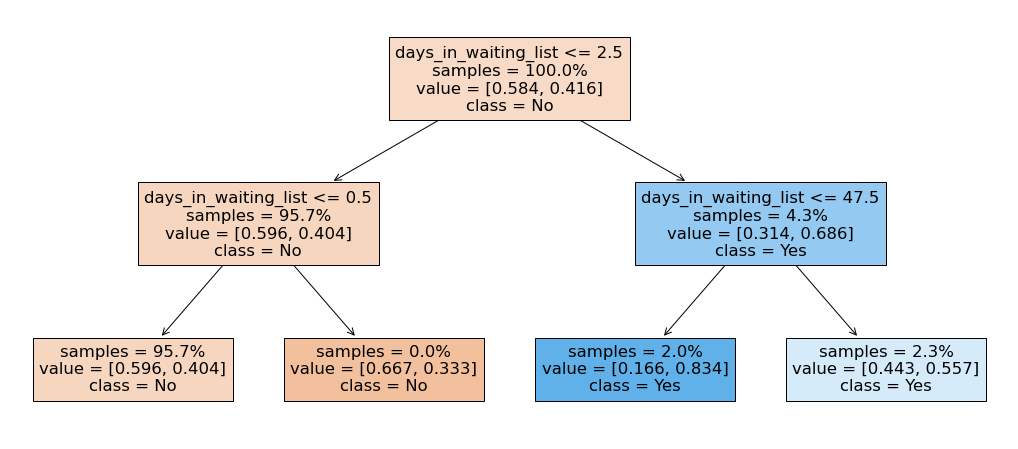

Precision:  66.3 %
Recall:  7.1 %


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

def plot_decision_tree(model):
    fig, ax = plt.subplots(figsize=(18, 8))
    plot_tree(model, filled=True, impurity=False, feature_names=input_features, proportion=True, class_names=["No", "Yes"], ax=ax)
    plt.show()

# This is for the decision tree
# Define the input features, create the input table (X), define the target feature (y), and perform the training-testing split
hotel_data = hotel_data[hotel_data['hotel'] == 'City Hotel']
input_features = ['days_in_waiting_list']
X = hotel_data[input_features]
y = hotel_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# Create the model and display the decision tree
tree_model = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
plot_decision_tree(tree_model)

# Create a list of the predictions and calculate the metrics
y_pred = tree_model.predict(X_test)
tree_model.predict(X_test)
print("Precision: ", round(100 * precision_score(y_test, y_pred, pos_label='Yes'), 1), "%")
print("Recall: ", round(100 * recall_score(y_test, y_pred, pos_label='Yes'), 1), "%")


This decision tree has shown it's decision making process, and from the precision metrics, we can see that the model has made some predictions with decently high accuracy at 66.3%, and this means that as far as precision, this is a strong model and is certainly useful for making decisions based on whether someone is going to cancel based on how many days they spent on the days in waiting list. As you can see, when there's a less than 0.5 days in waiting list, they stayed and didn't cancel. The model has shown that it is rather precise, making it a strong model. So all this being said, is that according to the model, only 4.3% had to wait above 2.5 days in the waiting list, and these people are the ones who cancel.

However, the recall for this model is not very strong, as it's only 7.1%. This means that it misses many of the people who actually canceled, and this isn't the strongest model due to this metric of such a low number. Not only that, but these decision trees aren't the most reliable models to interpret, as there are some recall issues, and the precision at 66.3% isn't the model with the highest precision so it's not amazing.

Overall, I think this model is precise and accurate, but this can improve in terms of identifying cancelations.

<a id='conclusion'></a>
# Conclusion

First of all, thank you very much for taking the time to read my practical assessment, this is much appreciated.

Now, onto my conclusion. 

Overall for the EDA, I think it's worth looking at the room types that people got and if they are canceled. This is because those who got a specific type of room had to wait long periods of time, POTENTIALLY because of the room having to be prepared, or because the room is popular. This is important as the hotel has to take that into account and sort it out, otherwise people will continue canceling.

Overall for the models, the models are both fairly precise, with the linear regression model making little errors and a fairly low RMSE. The decision tree model has an ok precision, at 66.3%. However, these models aren't the strongest with a R^2 of 17.984% for the linear regression model, and recall of 7.1% for the decision tree. These aren't the most impressive statistics, but I'm going to go with the fact that the recall is better at identifying cancelations. However, that being said, the linear regression model was more accurate, I believe, in terms of it's own respective values, meaning that I think looking at previous bookings not being canceled and them being a repeated guest can be good to analyse, and there seems to be some correlation between the two.

